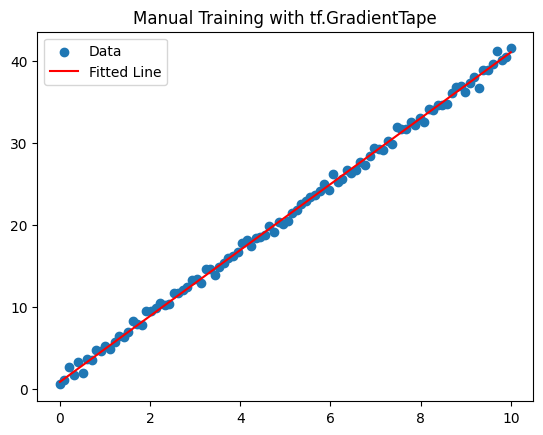

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X = np.linspace(0, 10, 100).astype(np.float32)
y = 4 * X + 1 + np.random.randn(*X.shape).astype(np.float32) * 0.5

# Convert to tensors
X_tensor = tf.convert_to_tensor(X.reshape(-1, 1), dtype=tf.float32)
y_tensor = tf.convert_to_tensor(y.reshape(-1, 1), dtype=tf.float32)

# Initialize weight and bias variables
W = tf.Variable(tf.random.normal([1, 1], dtype=tf.float32))
b = tf.Variable(tf.zeros([1], dtype=tf.float32))

# Set learning rate and number of epochs
lr = 0.01
epochs = 200

# Training loop using GradientTape
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(X_tensor, W) + b
        loss = tf.reduce_mean(tf.square(y_pred - y_tensor))

    gradients = tape.gradient(loss, [W, b])
    W.assign_sub(lr * gradients[0])
    b.assign_sub(lr * gradients[1])

# Make predictions after training
y_pred = tf.matmul(X_tensor, W) + b

# Plot results
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred.numpy(), color='red', label='Fitted Line')
plt.title("Manual Training with tf.GradientTape")
plt.legend()
plt.show()
